# **Building CNN - Convolutional Neural Network**

## Project Fashion-Classification - End to End 
 
- Train Convolutional Neural Network on 60,000 Fashion-MNIST Images (data in NP array)
 
- Test Convolutional Neural Network on 10,000 Fashion-MNIST Images (data in NP array)

## Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

## Load Data

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

## Print shape of Data

In [3]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [4]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [5]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [6]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
X_train[0] # image data in 2d numpy array shape 28x28 pixel

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [8]:
y_train[0]  #9 => Ankle boot

9

In [9]:
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
'''
0 => T-shirt/top 
1 => Trouser 
2 => Pullover 
3 => Dress 
4 => Coat 
5 => Sandal 
6 => Shirt 
7 => Sneaker 
8 => Bag 
9 => Ankle boot '''

'\n0 => T-shirt/top \n1 => Trouser \n2 => Pullover \n3 => Dress \n4 => Coat \n5 => Sandal \n6 => Shirt \n7 => Sneaker \n8 => Bag \n9 => Ankle boot '

## Show image

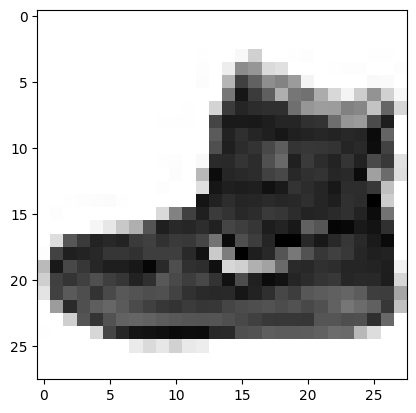

In [10]:
plt.imshow(X_train[0], cmap='Greys')

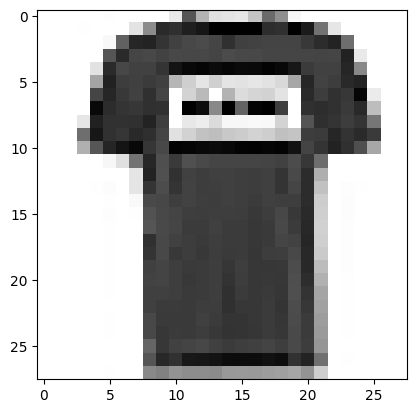

In [11]:
plt.imshow(X_train[1], cmap='Greys')

In [12]:
y_test[1]

2

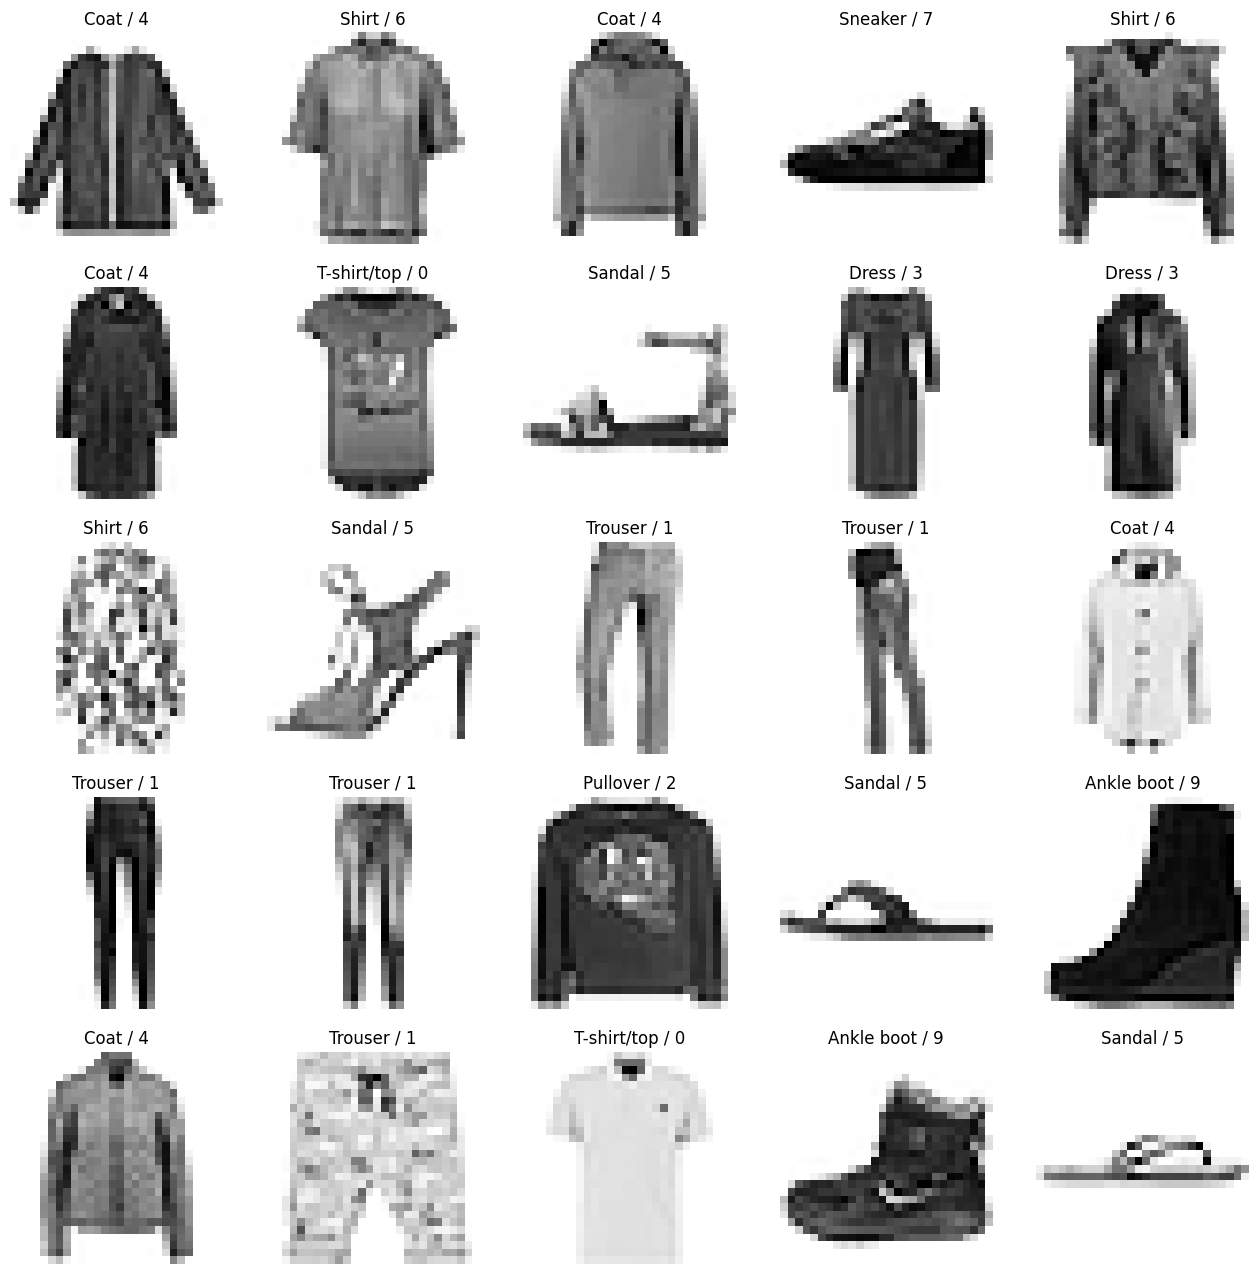

In [13]:
plt.figure(figsize=(16,16))

j = 1

for i in np.random.randint(0, 1000, 25):
    plt.subplot(5, 5, j); j += 1
    plt.imshow(X_train[i], cmap="Greys")
    plt.axis('off') # off the axis
    plt.title('{} / {}'.format(class_labels[y_train[i]], y_train[i]))

## Change Dimention

In [14]:
X_train.shape

(60000, 28, 28)

In [15]:
X_train.ndim

3

expected conv2d_input to have 4 dimensions, but got array with shape (28, 28, 1)

so we have increase the dimention 3 to 4

In [16]:
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [17]:
X_train.shape

(60000, 28, 28, 1)

In [18]:
X_train.ndim

4

## Feature Scaling

In [19]:
X_train = X_train/255
X_test = X_test/255

In [20]:
X_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [21]:
X_test[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

## Split Dataset

In [22]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=2020)

In [23]:
X_train.shape, y_train.shape

((48000, 28, 28, 1), (48000,))

In [24]:
X_valid.shape, y_valid.shape

((12000, 28, 28, 1), (12000,))

## Convolutional Neural Network - Model Building

Building CNN model

In [25]:
cnn_model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(units=256, activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dense(units=10, activation='softmax')
])

cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 3, 3, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 576)               0         
                                                                 
 dense (Dense)               (None, 128)               7

Complie the model

In [26]:
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Train cnn model

In [27]:
cnn_model.fit(X_train, y_train, epochs=20, batch_size=512, verbose=1, validation_data=(X_valid, y_valid))

Epoch 1/20
94/94 [==============================] - 2s 13ms/step - loss: 1.0347 - accuracy: 0.6115 - val_loss: 0.5779 - val_accuracy: 0.7698
Epoch 2/20
94/94 [==============================] - 1s 10ms/step - loss: 0.5526 - accuracy: 0.7905 - val_loss: 0.4786 - val_accuracy: 0.8202
Epoch 3/20
94/94 [==============================] - 1s 9ms/step - loss: 0.4559 - accuracy: 0.8307 - val_loss: 0.4087 - val_accuracy: 0.8483
Epoch 4/20
94/94 [==============================] - 1s 9ms/step - loss: 0.3969 - accuracy: 0.8552 - val_loss: 0.3686 - val_accuracy: 0.8635
Epoch 5/20
94/94 [==============================] - 1s 9ms/step - loss: 0.3637 - accuracy: 0.8669 - val_loss: 0.3373 - val_accuracy: 0.8736
Epoch 6/20
94/94 [==============================] - 1s 9ms/step - loss: 0.3387 - accuracy: 0.8741 - val_loss: 0.3243 - val_accuracy: 0.8777
Epoch 7/20
94/94 [==============================] - 1s 9ms/step - loss: 0.3195 - accuracy: 0.8816 - val_loss: 0.3157 - val_accuracy: 0.8823
Epoch 8/20
94/94 [

## Test and Evaluate Model

Test the Model

In [28]:
y_pred = cnn_model.predict(X_test)
y_pred.round(2)

313/313 [==============================] - 1s 1ms/step


array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.07, 0.  , 0.  ]], dtype=float32)

In [29]:
cnn_model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2727 - accuracy: 0.9051


[0.27267932891845703, 0.9050999879837036]

Visualize Output

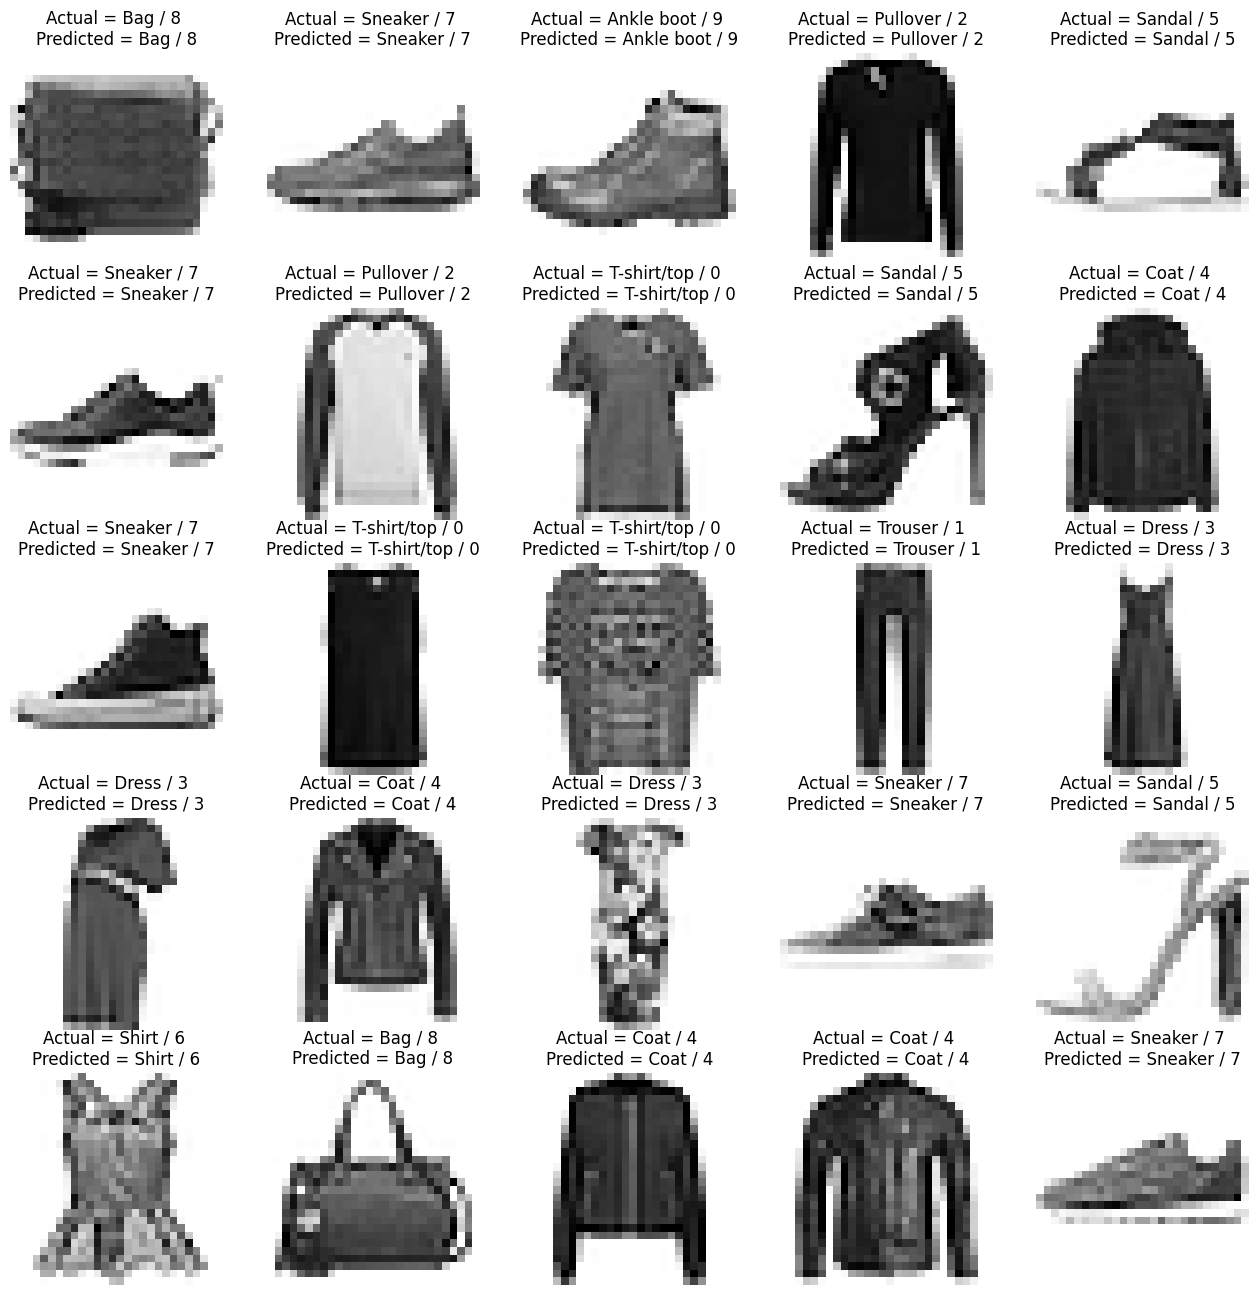

In [30]:
plt.figure(figsize=(16,16))

j=1
for i in np.random.randint(0, 1000, 25):
    plt.subplot(5,5,j); j+=1
    plt.imshow(X_test[i].reshape(28,28), cmap='Greys')
    plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])], np.argmax(y_pred[i])))
    plt.axis('off')

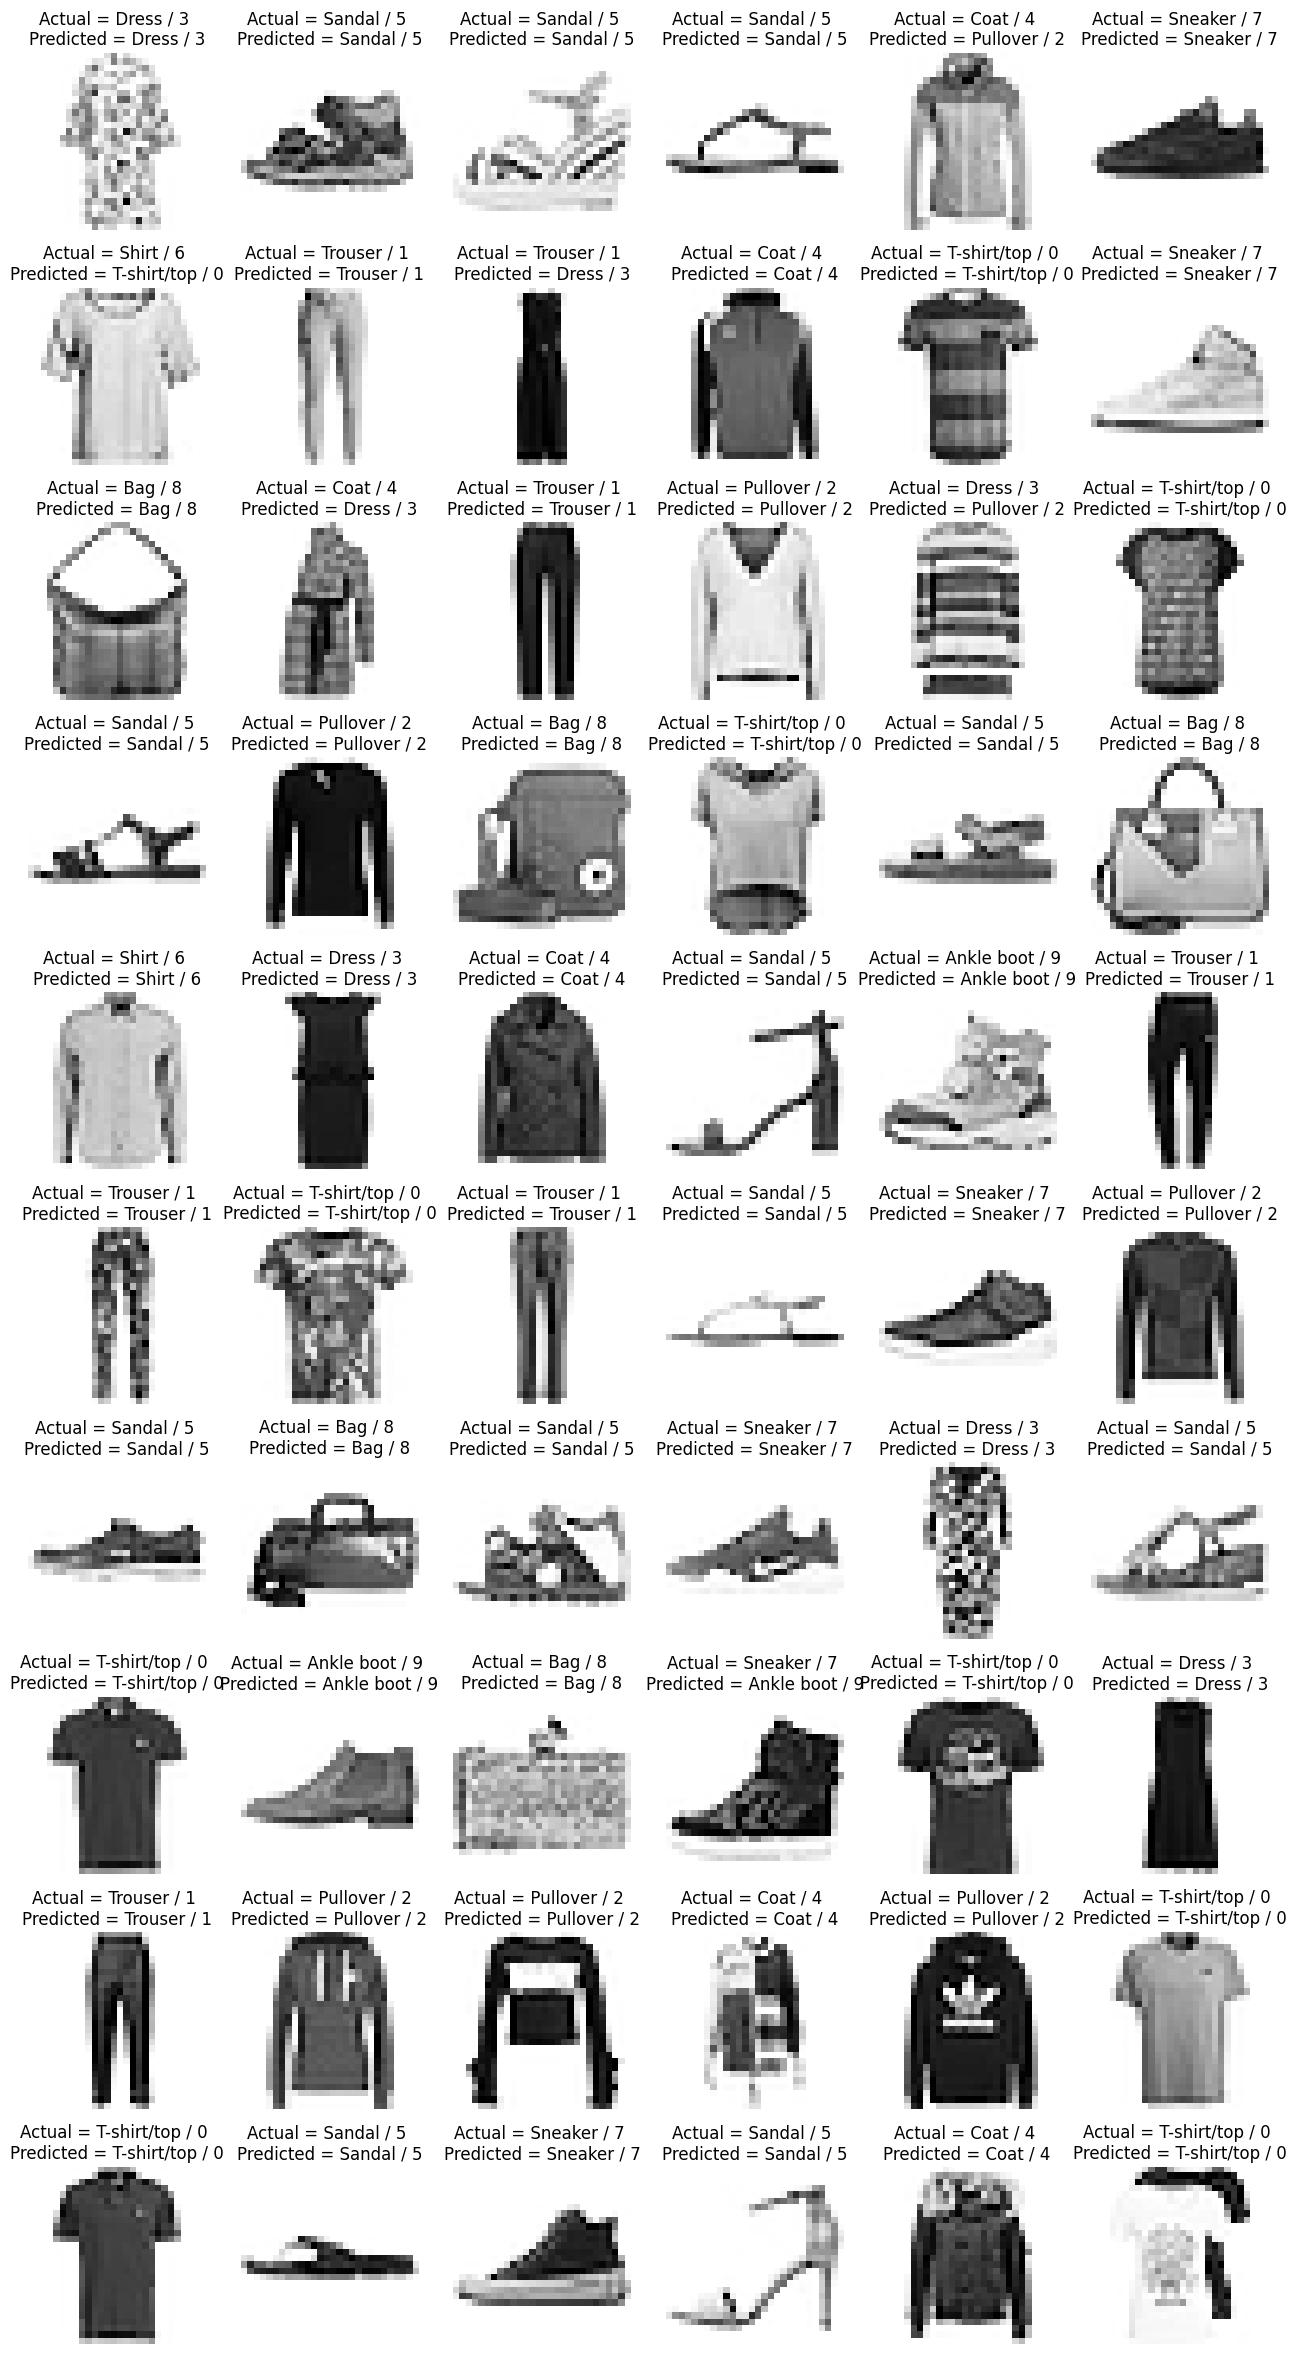

In [31]:
plt.figure(figsize=(16,30))
 
j=1
for i in np.random.randint(0, 1000,60):
  plt.subplot(10,6, j); j+=1
  plt.imshow(X_test[i].reshape(28,28), cmap = 'Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')

Confusion Matrix

<Axes: >

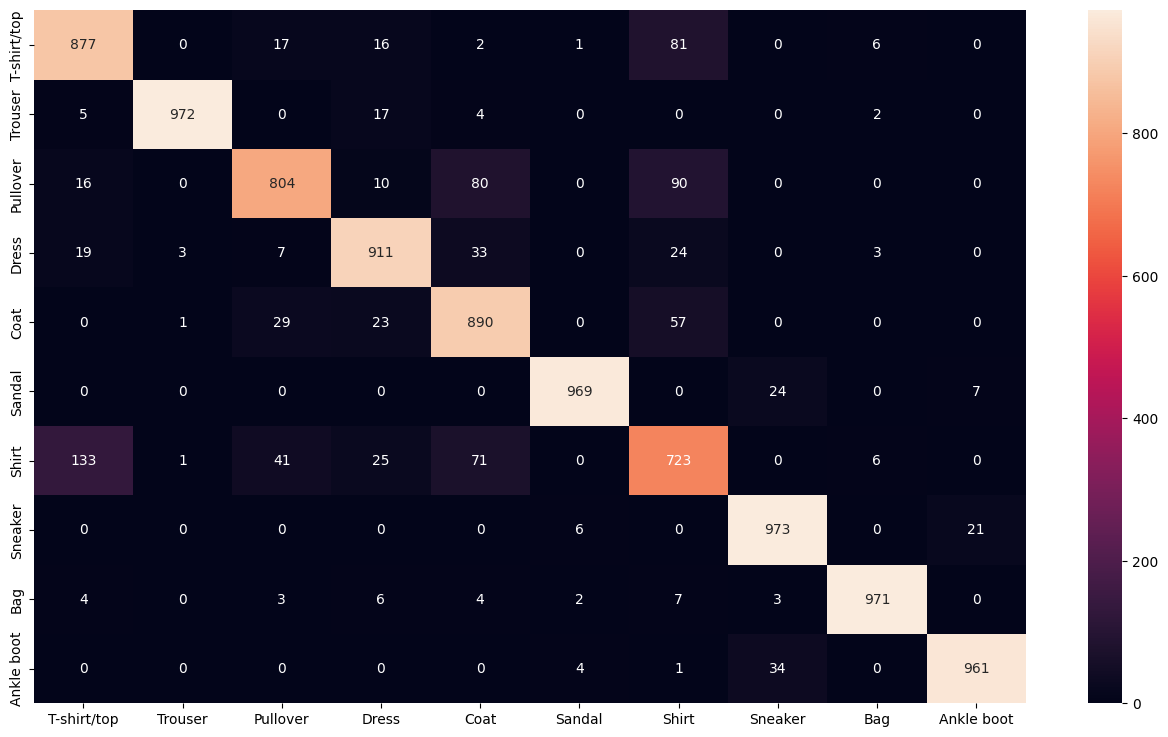

In [32]:
plt.figure(figsize=(16,9))
y_pred_labels = [ np.argmax(label) for label in y_pred ]
cm = confusion_matrix(y_test, y_pred_labels)
sns.heatmap(cm, annot=True, fmt='d',xticklabels=class_labels, yticklabels=class_labels)

Classification Report

In [33]:
cr= classification_report(y_test, y_pred_labels, target_names=class_labels)
print(cr)

              precision    recall  f1-score   support

 T-shirt/top       0.83      0.88      0.85      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.89      0.80      0.85      1000
       Dress       0.90      0.91      0.91      1000
        Coat       0.82      0.89      0.85      1000
      Sandal       0.99      0.97      0.98      1000
       Shirt       0.74      0.72      0.73      1000
     Sneaker       0.94      0.97      0.96      1000
         Bag       0.98      0.97      0.98      1000
  Ankle boot       0.97      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



## Save Model

In [35]:
cnn_model.save('models/fashion_mnist_cnn_model.h5') # save the model

## Load Model

In [36]:
fashion_mnist_cnn_model = keras.models.load_model('models/fashion_mnist_cnn_model.h5')

In [37]:
y_pred_sample = fashion_mnist_cnn_model.predict(np.expand_dims(X_test[0], axis=0)).round(2)
y_pred_sample

1/1 [==============================] - 0s 260ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [38]:
np.argmax(y_pred_sample[0])

9

In [39]:
y_test[0]

9